In [2]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [5]:
my_data = pd.read_csv("data/drug200.csv")
my_data.sample(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
147,26,F,HIGH,NORMAL,12.307,drugA
177,25,M,NORMAL,HIGH,19.011,drugY
73,41,F,NORMAL,NORMAL,22.905,drugY
66,29,M,HIGH,HIGH,12.856,drugA
28,39,F,LOW,NORMAL,22.697,drugY


In [6]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [8]:
label_encoder = LabelEncoder()
my_data['Sex'] = label_encoder.fit_transform(my_data['Sex']) 
my_data['BP'] = label_encoder.fit_transform(my_data['BP'])
my_data['Cholesterol'] = label_encoder.fit_transform(my_data['Cholesterol']) 
my_data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY
...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC
196,16,1,1,0,12.006,drugC
197,52,1,2,0,9.894,drugX
198,23,1,2,1,14.020,drugX


In [10]:
custom_map = {'drugA':0,'drugB':1,'drugC':2,'drugX':3,'drugY':4}
my_data['Drug_num'] = my_data['Drug'].map(custom_map)
my_data.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Drug_num
59,34,1,0,0,18.703,drugY,4
196,16,1,1,0,12.006,drugC,2
41,58,0,0,1,14.239,drugB,1
30,18,0,2,1,8.750,drugX,3
158,59,0,1,0,10.444,drugC,2
91,41,1,0,1,15.156,drugY,4
79,32,0,1,1,10.840,drugX,3
40,73,0,2,0,19.221,drugY,4
127,35,1,2,1,7.845,drugX,3
126,66,1,0,0,16.347,drugY,4


In [11]:
my_data_copy = my_data.drop(columns=['Drug'])
my_data_copy

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_num
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4
...,...,...,...,...,...,...
195,56,0,1,0,11.567,2
196,16,1,1,0,12.006,2
197,52,1,2,0,9.894,3
198,23,1,2,1,14.020,3


In [ ]:
# find the correlation of the input variables with the target variable

In [13]:
import seaborn as sns

In [16]:
corr = my_data_copy.corr()
corr

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_num
Age,1.000000,0.102027,0.054212,-0.068234,-0.063119,-0.004828
Sex,0.102027,1.000000,-0.007814,-0.008811,-0.125008,-0.098573
BP,0.054212,-0.007814,1.000000,-0.137552,-0.149312,0.372868
Cholesterol,-0.068234,-0.008811,-0.137552,1.000000,0.010000,0.055629
Na_to_K,-0.063119,-0.125008,-0.149312,0.010000,1.000000,0.589120
Drug_num,-0.004828,-0.098573,0.372868,0.055629,0.589120,1.000000


<Axes: >

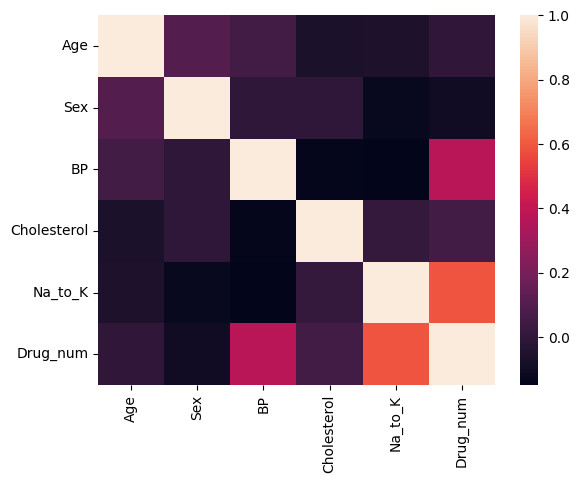

In [17]:
sns.heatmap(corr) 

In [ ]:
# blood pressure and sodium to potassium ratio are most highly correlated with the drug recommended

In [ ]:
# training

In [18]:
y = my_data['Drug']
X = my_data.drop(['Drug','Drug_num'], axis=1)

In [19]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=32)

In [39]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 5)

In [40]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [41]:
# predicting

In [42]:
tree_predictions = drugTree.predict(X_testset)

In [23]:
print("Decision Trees's Accuracy: ", metrics.accuracy_score(y_testset, tree_predictions))

Decision Trees's Accuracy:  0.9833333333333333


In [ ]:
# max depth set to 3

In [28]:
print("Decision Trees's Accuracy: ", metrics.accuracy_score(y_testset, tree_predictions))

Decision Trees's Accuracy:  0.8166666666666667


In [ ]:
# max depth set to 5

In [43]:
print("Decision Trees's Accuracy: ", metrics.accuracy_score(y_testset, tree_predictions))

Decision Trees's Accuracy:  0.9833333333333333
